# My stable diffusion model has been fine tuned to create pictures of a dog.

I took these pictures from an account on Instagram. [Linked here.](https://www.instagram.com/chobi_akita_dog/)

Running this on Google Colab, it is very liable to run out of RAM and crash.

In [4]:
!pip install -U peft transformers diffusers

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 44.1/44.1 kB 4.2 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 10.0/10.0 MB 97.3 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 2.9/2.9 MB 54.2 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 3.0/3.0 MB 61.9 MB/s eta 0:00:00
  Attempting uninstall: tokenizers
    Found existing installation: tokenizers 0.19.1
    Uninstalling tokenizers-0.19.1:
      Successfully uninstalled tokenizers-0.19.1
  Attempting uninstall: diffusers
    Found existing installation: diffusers 0.30.3
    Uninstalling diffusers-0.30.3:
      Successfully uninstalled diffusers-0.30.3
  Attempting uninstall: transformers
    Found existing installation: transformers 4.44.2
    Uninstalling transformers-4.44.2:
      Successfully uninstalled transformers-4.44.2


In [ ]:
from diffusers import DiffusionPipeline
import torch

# Base Dreambooth Stable Diffusion model
pipe = DiffusionPipeline.from_pretrained(
    "stabilityai/stable-diffusion-xl-base-1.0",
    torch_dtype=torch.float16,
    variant='fp16',
    use_safetensors=True
).to("cuda")

# CPU offloading to save GPU memory
pipe.enable_model_cpu_offload()

# my trained weights of the dreambooth model
pipe.load_lora_weights("emyles9986/sdxl-base-1.0-chobidawg-dreambooth-lora")

In [ ]:
identifier = "a photo of sks dog"

# Edit this to display whatever you want!
prompt = f"{identifier} in South America"

image = pipe(
    prompt = prompt,
    num_inference_steps = 50,
    height=1024,
    width=1024,
    # guidance_scale = 7.0,
).images[0]

  0%|          | 0/50 [00:00<?, ?it/s]

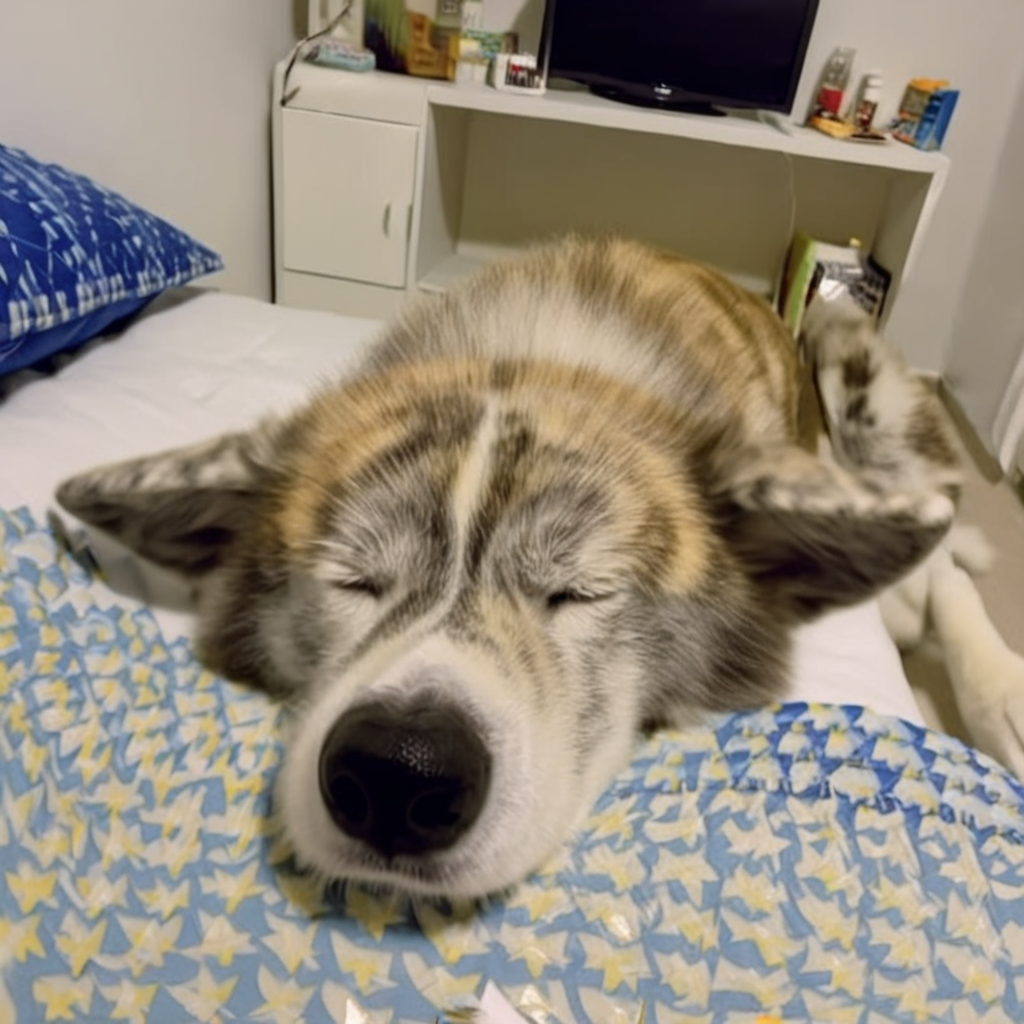

In [7]:
image

In [ ]:
# Save Image?
image.save(f"sdxl_chobi_{prompt}.png")